 <h1 align="center"><font color = "#0066ff">Credit Card Fraud Detection</h3> 

## Dataset Information

The dataset includes credit card transactions by European cardholders in September 2013, focusing on transactions over two days. Out of 284,807 transactions, 492 are fraudulent, making up just 0.172% of the data, which highlights a significant class imbalance.
All features, except 'Time' and 'Amount,' are numerical values obtained through PCA transformation, with the original features withheld due to confidentiality. 'Time' indicates the time elapsed since the first transaction, and 'Amount' represents the transaction amount, useful for cost-sensitive learning. The target variable 'Class' indicates whether a transaction is fraudulent (1) or not (0).

In [1]:
# Importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

# Make NumPy printouts easier to read.Desktop/courseAIML/Capstone/creditcard.csv
np.set_printoptions(precision=3, suppress=True)

# To ignore the warnings that may appear
import warnings
warnings.filterwarnings("ignore")

# Importing the sklearn modules to be used
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn import metrics #for checking the model accuracy

## Importing the data

### Dataset downloaded from kaggle: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data

In [2]:
# Loading the data
df=pd.read_csv(r"C:\Users\Vinod\Desktop\courseAIML\Capstone\creditcard\creditcard.csv")
#df=pd.read_csv("creditcard.csv")
#df=pd.read_csv("creditcard - Copy.csv")

## Data Understanding
### Using various methods to understand dataset

In [3]:
# Display the first 5 rows of the dataframe
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
# Get basic information about the dataframe
print("Summary of the data\n")
display(df.info())
print("\n", "--" * 50, "\n")

Summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  fl

None


 ---------------------------------------------------------------------------------------------------- 



In [6]:
print("Credit Card Fraud Detection - dimension of the data -  rows:",df.shape[0]," columns:", df.shape[1])

Credit Card Fraud Detection - dimension of the data -  rows: 284807  columns: 31


## Data Preprocessing

In [7]:
# Checking for missing values
print(df.isnull().sum())
print("\n", "--" * 50, "\n")

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

 ---------------------------------------------------------------------------------------------------- 



In [8]:
# Checking for Null Values!
df.isnull().sum().max()

0

From this output, this dataset does not contain null values and duplicates. So, the data is good to proceed.

In [9]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [10]:
print("Statistical description:")
display(df.describe())
print("\n", "--" * 50, "\n")

Statistical description:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000



 ---------------------------------------------------------------------------------------------------- 



Observation:
The Time feature has a wide range (from 0 to 172,792), suggesting the dataset covers a broad time span.
The V1 to V28 features have been scaled and centered around 0, as seen from their means being close to zero.
The Amount feature shows that most transactions are relatively small, but there are some very large ones, as indicated by the high maximum value.
The Class distribution shows a significant imbalance, with very few fraud cases (since the mean is close to 0, and the 75% percentile is 0).
This statistical summary helps to understand the distribution, scale, and central tendencies of your data before moving on to 
further analysis or modeling.

## Exploratory Data Analysis (EDA)

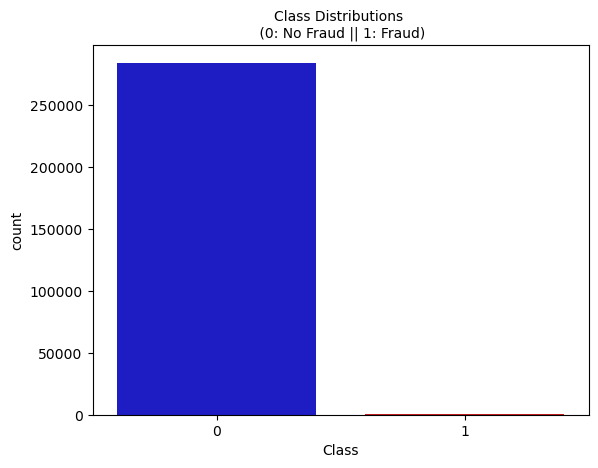

In [11]:
colors = ["#0101DF", "#DF0101"]
sns.countplot(x='Class', data=df, hue='Class', palette=colors, legend=False)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=10)
plt.savefig('Class Distributions')
plt.show()


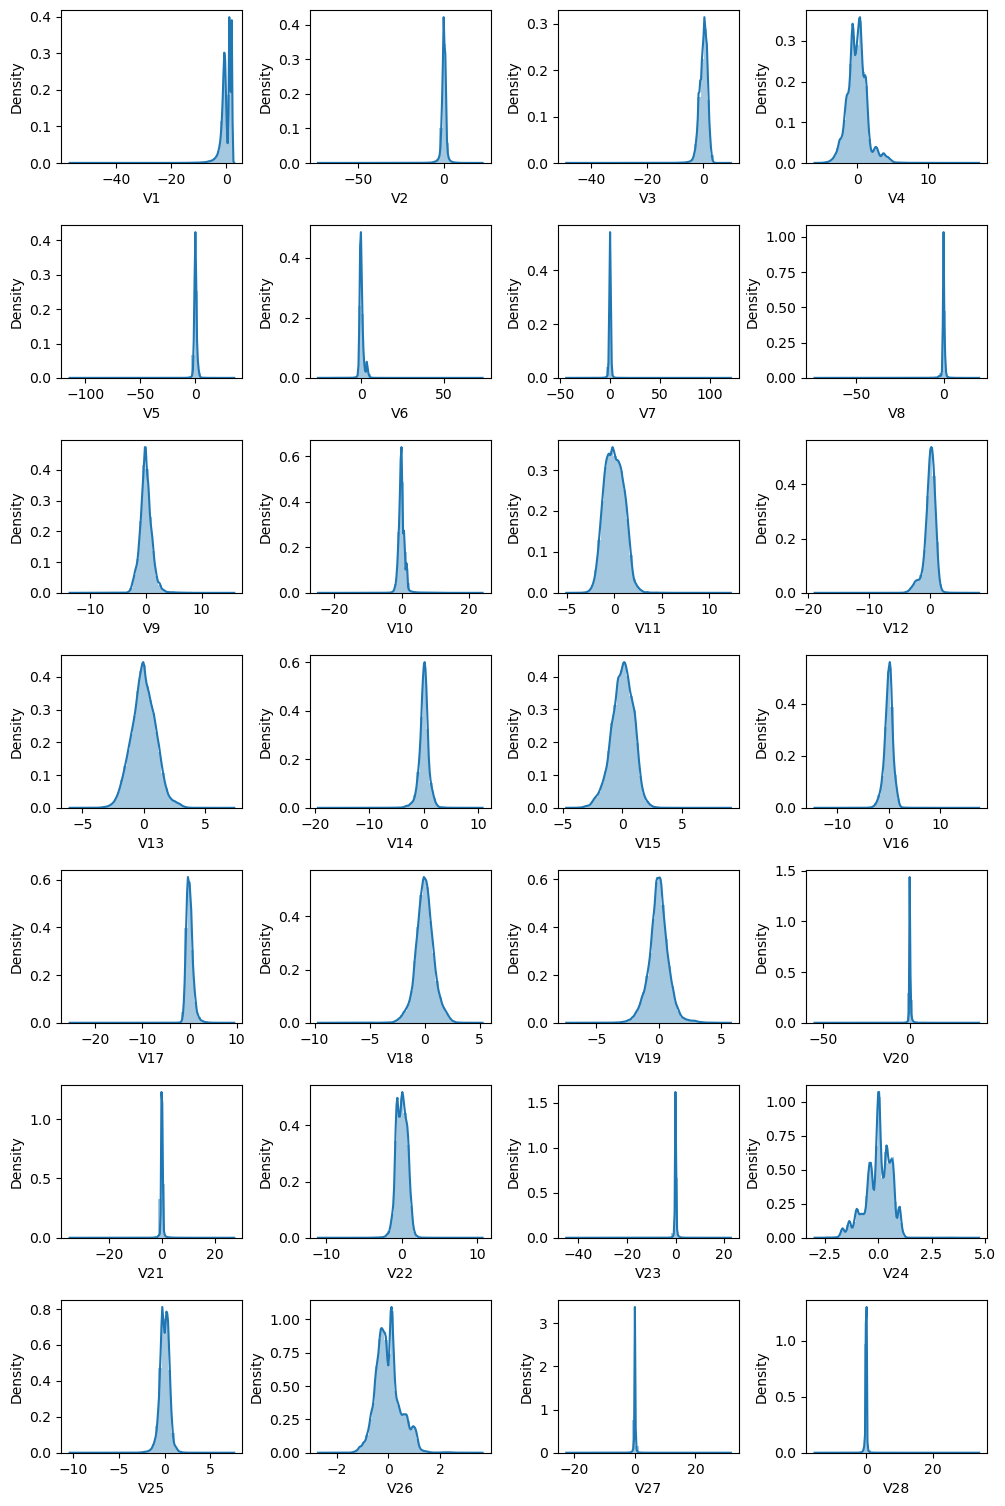

In [12]:
df_temp = df.drop(columns=['Time', 'Amount', 'Class'], axis=1)
# create dist plots
fig, ax = plt.subplots(ncols=4, nrows=7, figsize=(10,15))
index = 0
ax = ax.flatten()

for col in df_temp.columns:
    sns.distplot(df_temp[col], ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=1)
plt.savefig('dist plots')

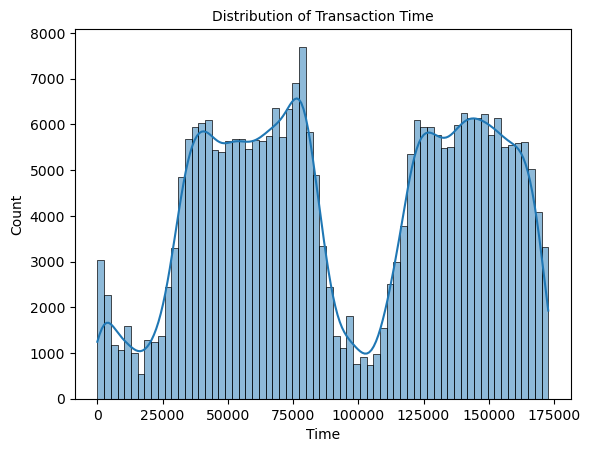

In [13]:
sns.histplot(df['Time'], kde=True)
plt.title('Distribution of Transaction Time', fontsize=10)
plt.savefig('Distribution of Transaction Time')
plt.show()

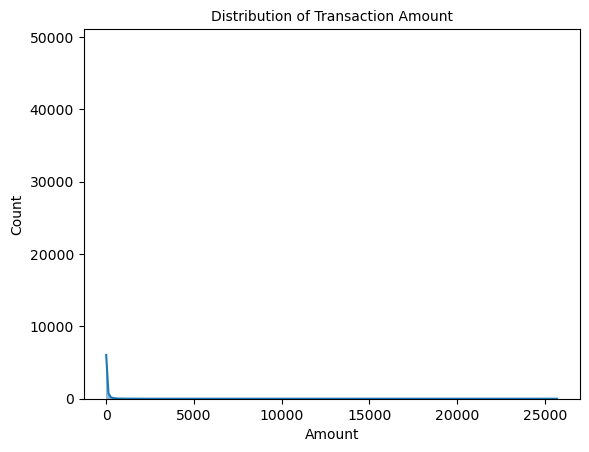

In [14]:
sns.histplot(df['Amount'], kde=True)
plt.title('Distribution of Transaction Amount', fontsize=10)
plt.savefig('Distribution of Transaction Amount')
plt.show()

## Coorelation Matrix

In [15]:
df.corr(numeric_only=True)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


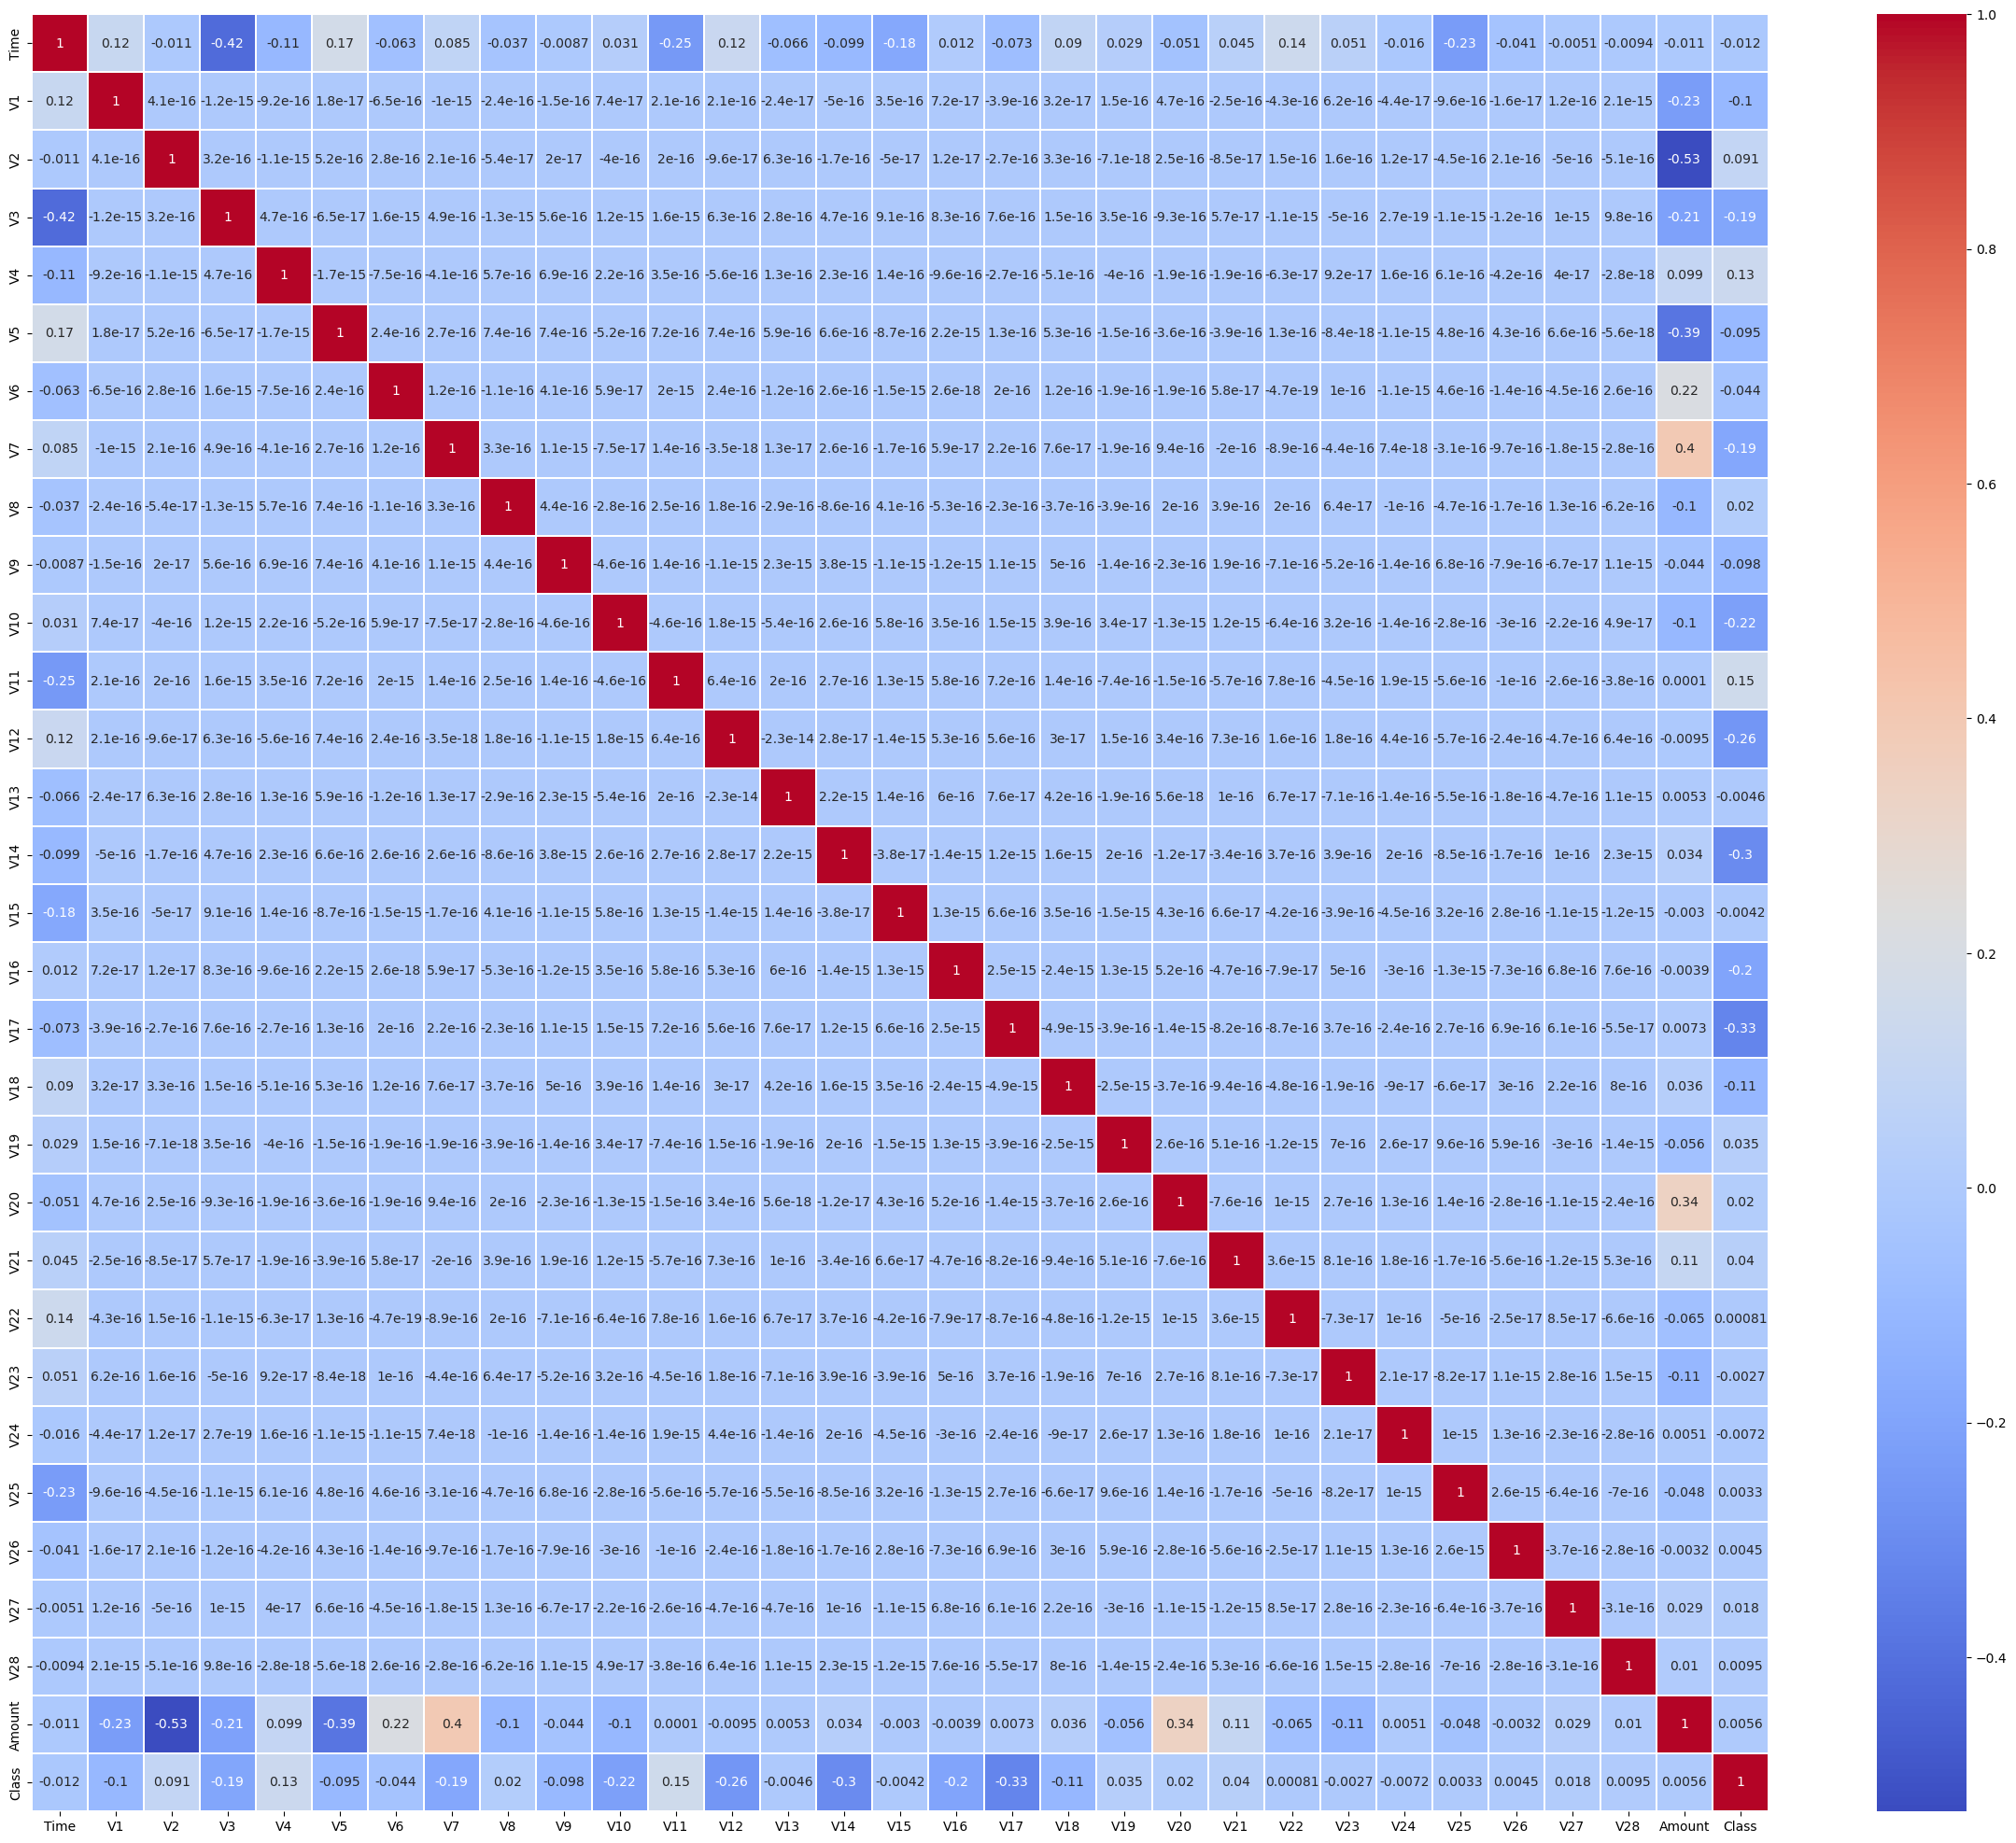

In [16]:
corrdf = df.corr()
plt.figure(figsize=(30,25))
sns.heatmap(df.corr(),linewidth=.01,annot=True,cmap="coolwarm")
plt.savefig('correlationfigure')
plt.show()

In [17]:
df.corr(numeric_only=True).unstack().sort_values(ascending = False).drop_duplicates()

Time    Time      1.000000
Amount  V7        0.397311
V20     Amount    0.339403
Amount  V6        0.215981
V5      Time      0.173072
                    ...   
V14     Class    -0.302544
V17     Class    -0.326481
Amount  V5       -0.386356
V3      Time     -0.419618
V2      Amount   -0.531409
Length: 466, dtype: float64

## Feature Selection

In [18]:
# Selecting the predictors and target
X = df.drop(columns=['Class'], axis=1)  # taking all columns as input except Class column
y = df['Class']   # taking only Class column as the target

## Splitting the data to train and test sets

In [19]:
# Split the data into train and test
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23)
print("Train Shape",X_train.shape)
print("Test Shape",X_test.shape)

Train Shape (213605, 30)
Test Shape (71202, 30)


In [20]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
230594,146400.0,1.979508,-0.635424,-0.207408,0.026741,-0.602119,0.550646,-1.138170,0.371555,1.273422,...,-0.199328,0.040617,0.185610,0.311342,0.222658,-0.589939,0.464982,-0.022365,-0.049327,1.00
283955,172031.0,1.531339,-1.037653,-1.463995,0.629151,-0.170698,-0.334226,0.270834,-0.221085,0.682666,...,0.383177,0.125038,-0.138873,-0.052593,0.513487,-0.179834,0.213479,-0.102713,-0.003778,282.99
280581,169622.0,-0.407818,0.355144,2.325731,1.292667,-1.119755,1.875951,-2.104822,-2.015783,0.566747,...,0.682416,-1.128915,0.991329,-0.420513,-0.393538,1.376190,-0.116615,0.123674,0.187405,31.00
136421,81699.0,1.056541,0.044989,0.073865,0.621964,-0.228495,-0.937823,0.471292,-0.234203,-0.243078,...,0.032831,-0.282903,-1.000714,0.142166,0.408227,0.143660,0.138179,-0.061958,0.024245,89.90
93196,64291.0,0.005507,-0.376249,1.035175,-2.082510,-0.787151,-0.287942,0.006063,-0.212906,-2.535766,...,-0.040309,0.005404,0.361346,-0.164533,-0.421955,0.281069,-0.032982,0.038864,0.020530,73.75


## Data modelling

### Logistic Regression Classification

In [21]:
# Importing the algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import classification_report, confusion_matrix, \
                            precision_score, recall_score

In [22]:
# instantiating and training the model on training dataset, 
# and making predictions for the testing data

log = LogisticRegression()
log.fit(X_train,y_train)
logPrediction = log.predict(X_test)
logAccuracy = metrics.accuracy_score(y_test, logPrediction)
print("The accuracy of logistic regression is:", logAccuracy*100, "%")
# printing the classification report for logistic regression model
print(metrics.classification_report(y_test, logPrediction))
print("Confusion Matrix:")
confusion_matrix(y_test, logPrediction)

The accuracy of logistic regression is: 99.90028369989608 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71085
           1       0.69      0.71      0.70       117

    accuracy                           1.00     71202
   macro avg       0.85      0.85      0.85     71202
weighted avg       1.00      1.00      1.00     71202

Confusion Matrix:


array([[71048,    37],
       [   34,    83]], dtype=int64)

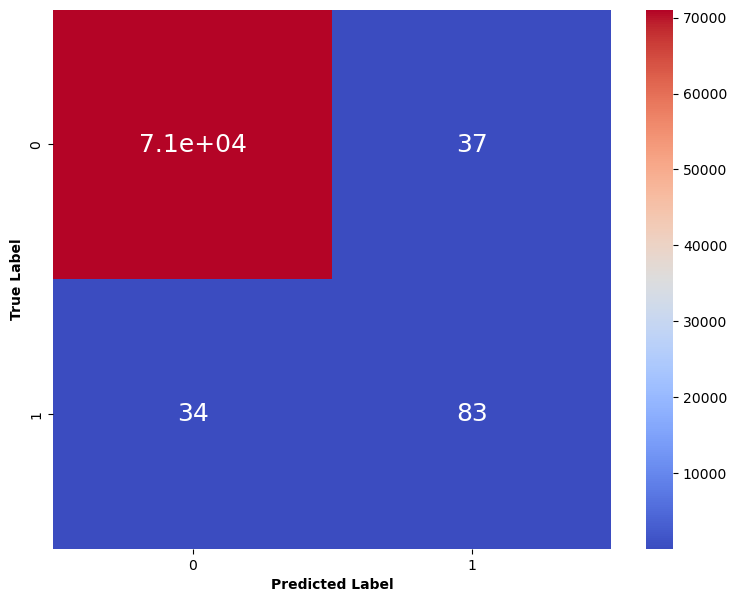

In [23]:
# Plot the confusion matrix using Seaborn library
plt.figure(figsize=(9,7))
_ = sns.heatmap(confusion_matrix(y_test, logPrediction), 
                annot=True, annot_kws={"size": 18},
                cmap=plt.cm.coolwarm)
                # xticklabels=outcome, yticklabels=outcome)
_ = plt.ylabel('True Label', fontweight='bold')
_ = plt.xlabel('Predicted Label', fontweight='bold')
plt.savefig('logistic regression confusion matrix ori ')

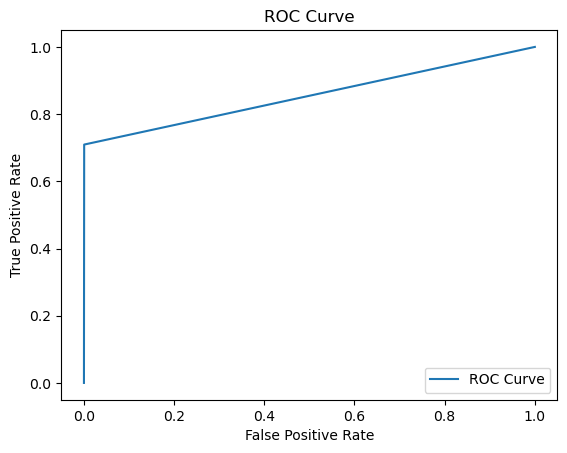

In [24]:
# ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logPrediction)
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.savefig('logistic regression Roc curve ori ')
plt.show()

### RandomForest Classifier

In [25]:
# importing the model
from sklearn.ensemble import RandomForestClassifier

In [26]:
forest = RandomForestClassifier(n_estimators=50)
forest.fit(X_train, y_train)
forestPrediction = forest.predict(X_test)
forestAccuracy = metrics.accuracy_score(y_test, forestPrediction)
print("The accuracy of RandomForest model is:", forestAccuracy*100, "%")
# printing the classification report for Random Forest Classifier model
print(metrics.classification_report(y_test, forestPrediction))
confusion_matrix(y_test, forestPrediction)

The accuracy of RandomForest model is: 99.96910199151709 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71085
           1       0.94      0.86      0.90       117

    accuracy                           1.00     71202
   macro avg       0.97      0.93      0.95     71202
weighted avg       1.00      1.00      1.00     71202



array([[71079,     6],
       [   16,   101]], dtype=int64)

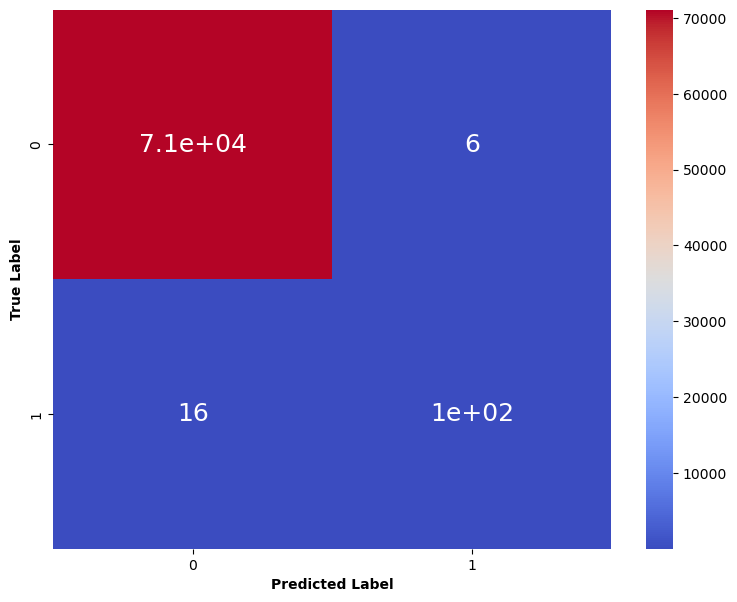

In [27]:
# Plot the confusion matrix using Seaborn library
plt.figure(figsize=(9,7))
_ = sns.heatmap(confusion_matrix(y_test, forestPrediction), 
                annot=True, annot_kws={"size": 18},
                cmap=plt.cm.coolwarm)
                # xticklabels=outcome, yticklabels=outcome)
_ = plt.ylabel('True Label', fontweight='bold')
_ = plt.xlabel('Predicted Label', fontweight='bold')
plt.savefig('Random Forest confusion matrix ori ')

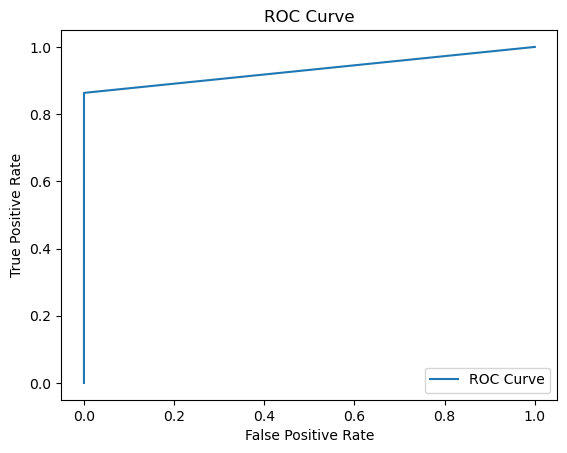

In [28]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, forestPrediction)
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.savefig('forest Roc curve ori ')
plt.show()

### Decision Tree Classifier

In [29]:
# import the model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

In [30]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
treePrediction=tree.predict(X_test)
treeAccuracy = metrics.accuracy_score(y_test, treePrediction)
print("The accuracy of Decision Tree model is:", treeAccuracy*100, "%")
# printing the classification report for Decision Tree model
print(metrics.classification_report(y_test, treePrediction))
confusion_matrix(y_test, treePrediction)

The accuracy of Decision Tree model is: 99.91011488441336 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71085
           1       0.70      0.80      0.75       117

    accuracy                           1.00     71202
   macro avg       0.85      0.90      0.87     71202
weighted avg       1.00      1.00      1.00     71202



array([[71044,    41],
       [   23,    94]], dtype=int64)

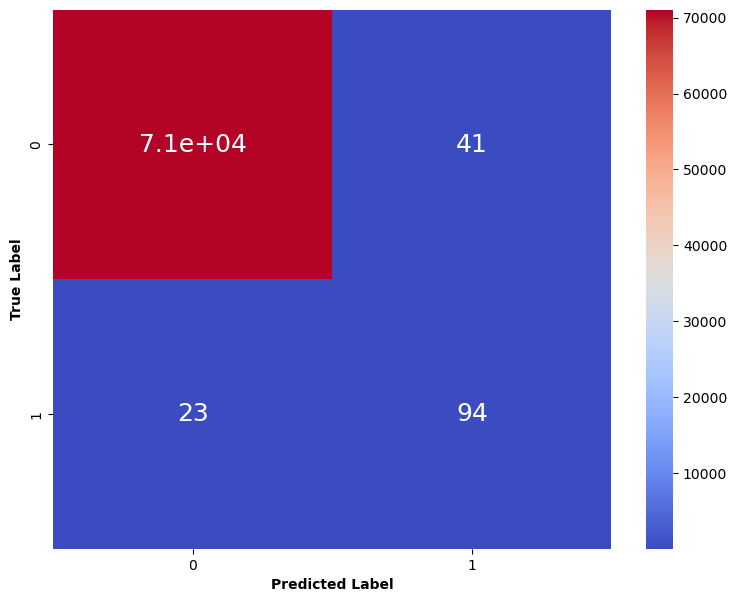

In [31]:
# Plot the confusion matrix using Seaborn library
plt.figure(figsize=(9,7))
_ = sns.heatmap(confusion_matrix(y_test, treePrediction), 
                annot=True, annot_kws={"size": 18},
                cmap=plt.cm.coolwarm)
                # xticklabels=outcome, yticklabels=outcome)
_ = plt.ylabel('True Label', fontweight='bold')
_ = plt.xlabel('Predicted Label', fontweight='bold')
plt.savefig('tree confusion matrix ori ')

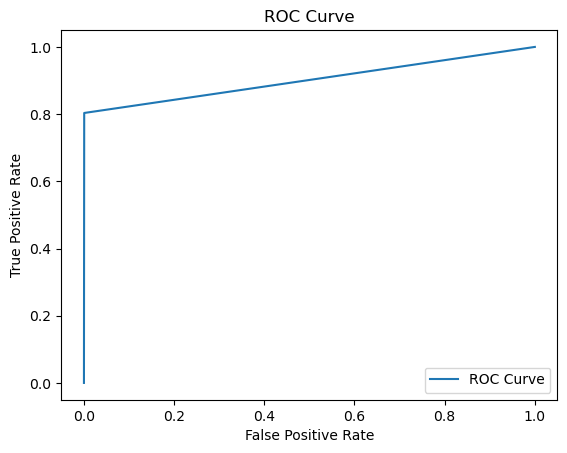

In [32]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, treePrediction)
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.savefig('tree Roc curve ori ')
plt.show()

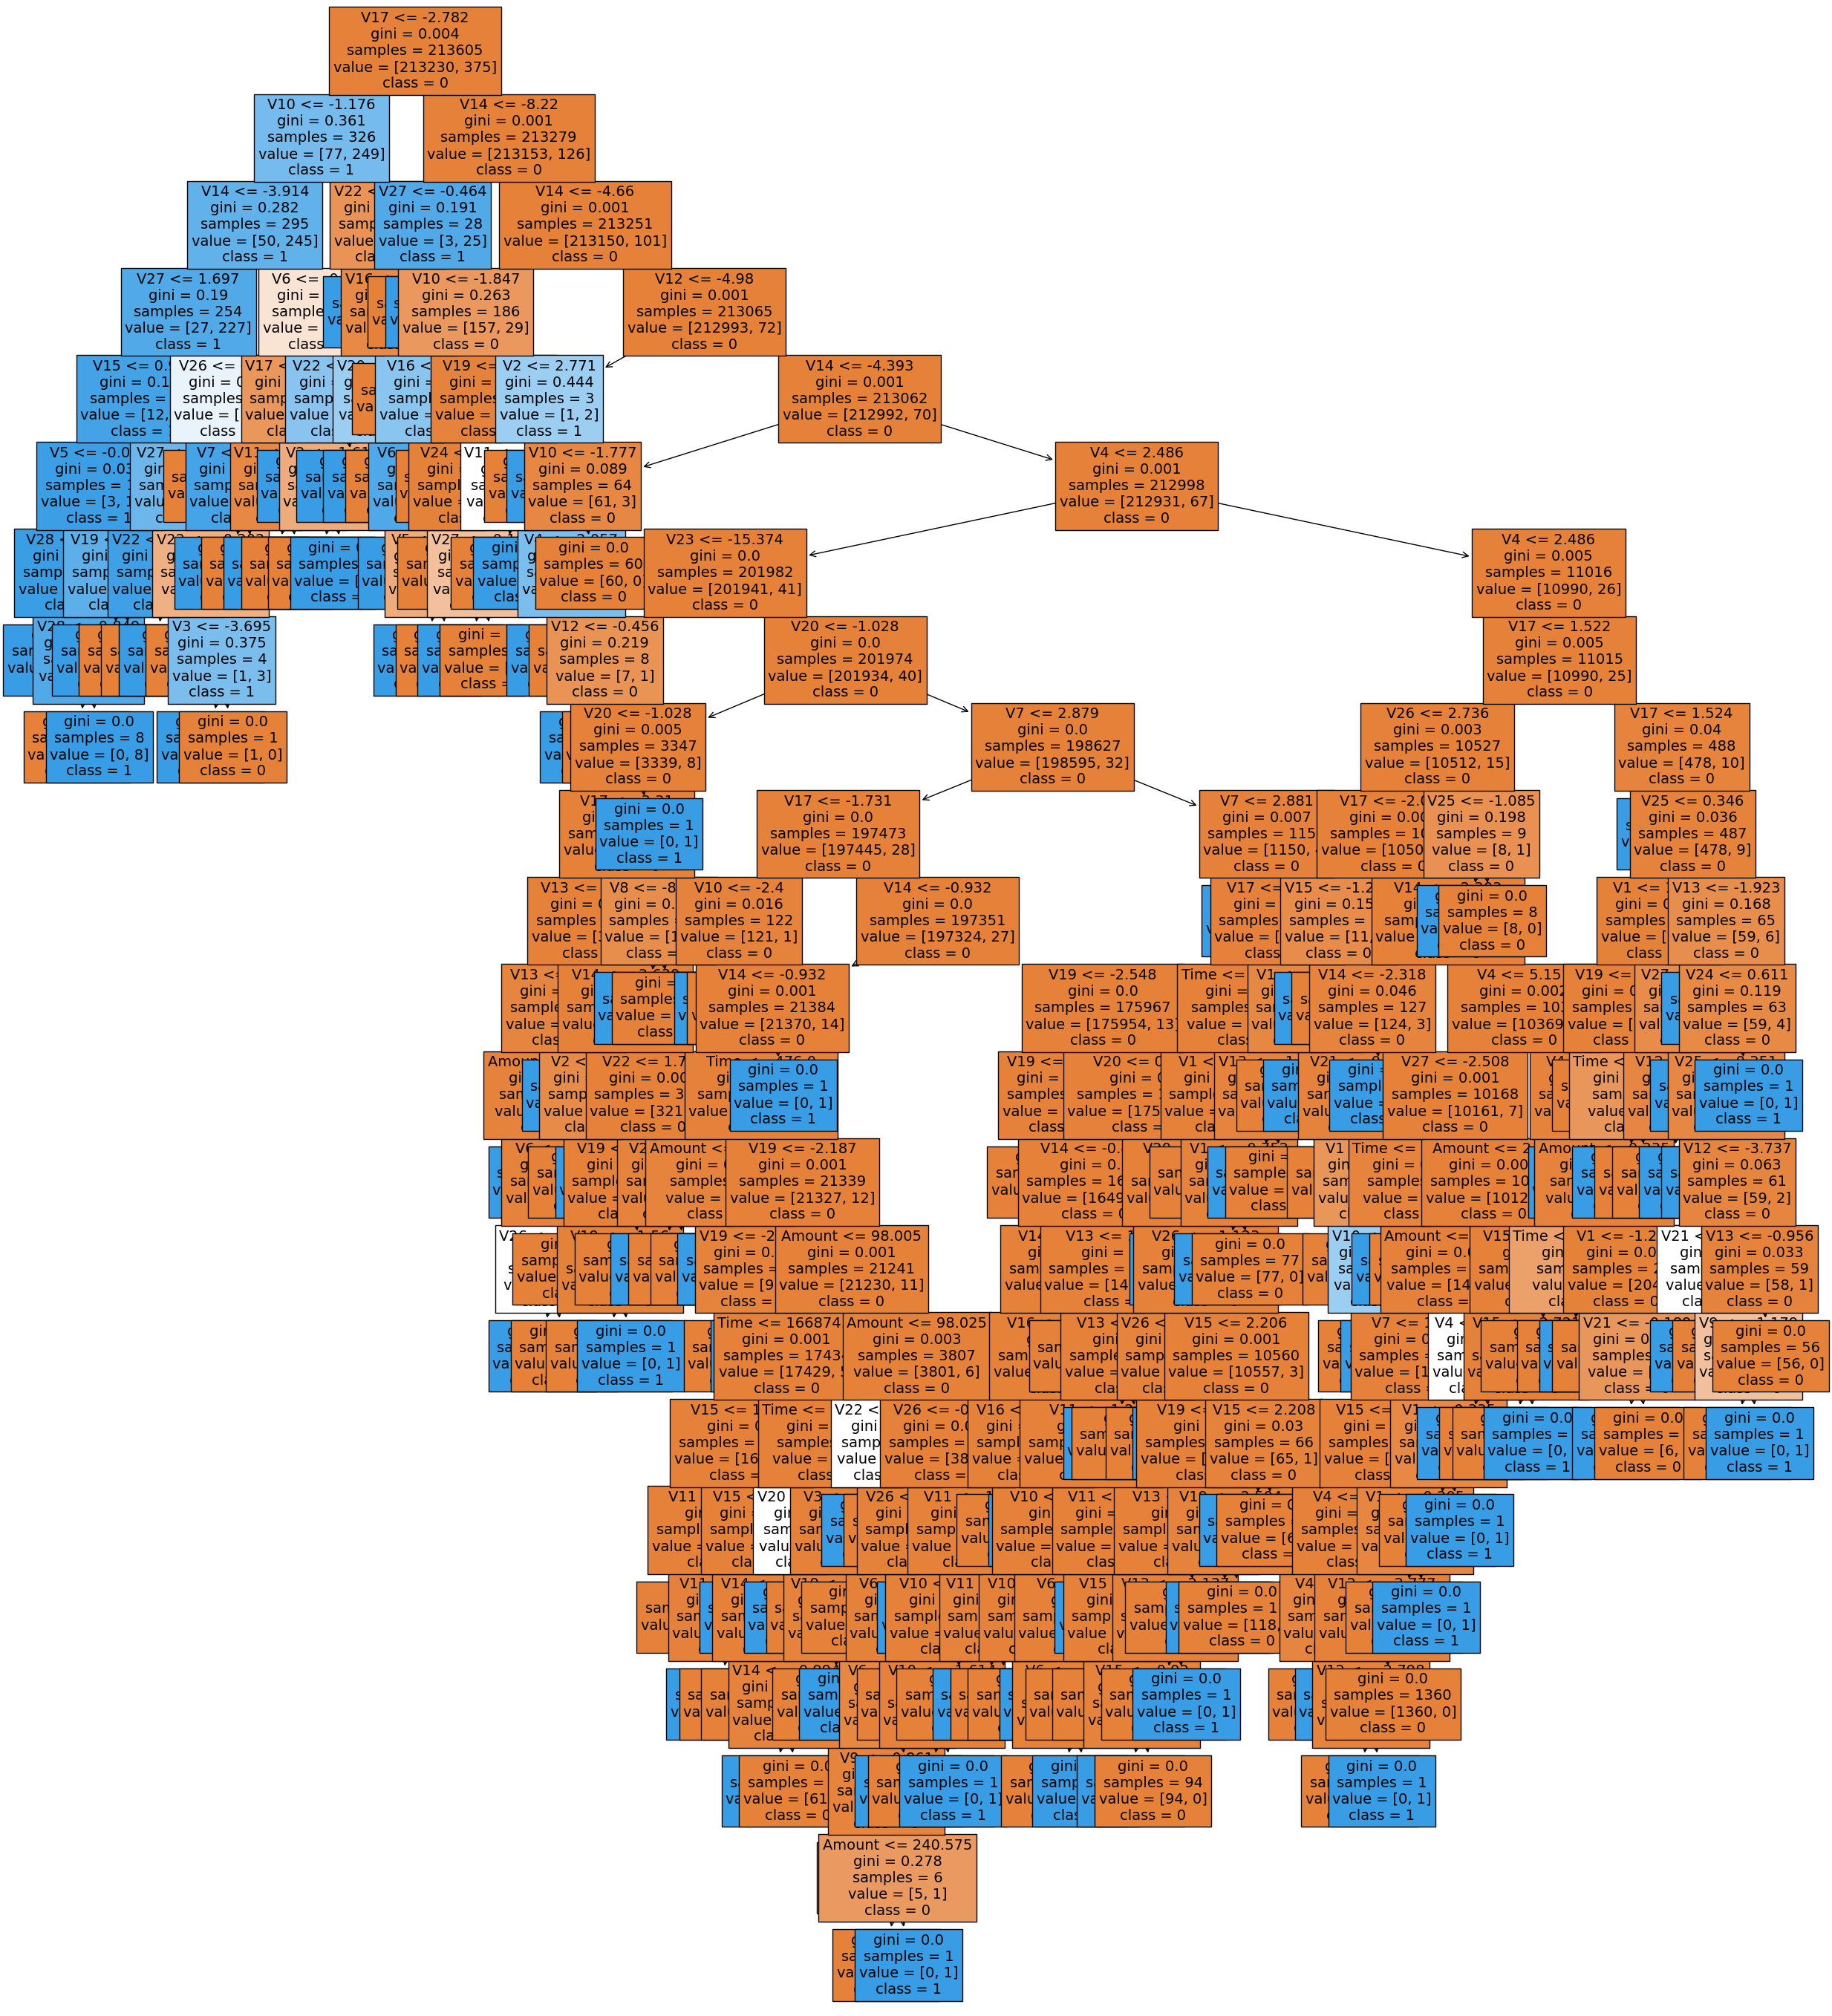

In [33]:
# Assuming X_train and y_train are your features and target variables
# Train the decision tree model
from sklearn import tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Generate the tree plot
plt.figure(figsize=(30, 35))
tree_plot = tree.plot_tree(
    decision_tree,  # Pass the trained decision tree model
    feature_names=X_train.columns,
    class_names=[str(cls) for cls in y_train.unique()],
    filled=True,
    fontsize=14
)
plt.show()


### XGBoost Modeling

In [34]:
#pip install xgboost

In [35]:
import xgboost as xgb
from xgboost import XGBClassifier

# Calculate the ratio of non-fraud to fraud cases in the training data
ratio_of_nonfraud_to_fraud = (y_train.value_counts()[0] / y_train.value_counts()[1])
xgb_model = XGBClassifier(scale_pos_weight=ratio_of_nonfraud_to_fraud, random_state=42)
xgb_model.fit(X_train, y_train)
xgbPrediction = xgb_model.predict(X_test)
xgbAccuracy = metrics.accuracy_score(y_test, xgbPrediction)
print("The accuracy of XGBoost model is:", xgbAccuracy*100, "%")
# printing the classification report for XGBoost model
print(metrics.classification_report(y_test, xgbPrediction))
confusion_matrix(y_test, xgbPrediction)

The accuracy of XGBoost model is: 99.96629308165501 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71085
           1       0.91      0.88      0.90       117

    accuracy                           1.00     71202
   macro avg       0.96      0.94      0.95     71202
weighted avg       1.00      1.00      1.00     71202



array([[71075,    10],
       [   14,   103]], dtype=int64)

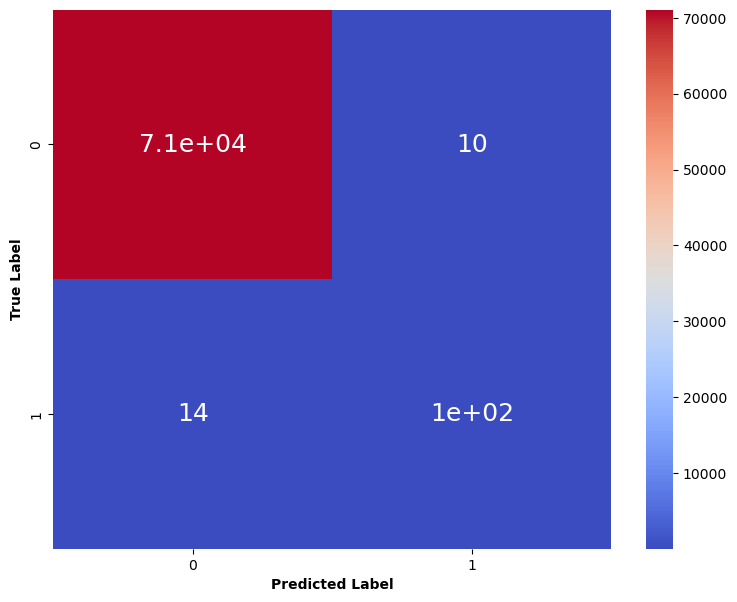

In [36]:
# Plot the confusion matrix using Seaborn library
plt.figure(figsize=(9,7))
_ = sns.heatmap(confusion_matrix(y_test, xgbPrediction), 
                annot=True, annot_kws={"size": 18},
                cmap=plt.cm.coolwarm)
                # xticklabels=outcome, yticklabels=outcome)
_ = plt.ylabel('True Label', fontweight='bold')
_ = plt.xlabel('Predicted Label', fontweight='bold')
plt.savefig('xgb confusion matrix ori ')

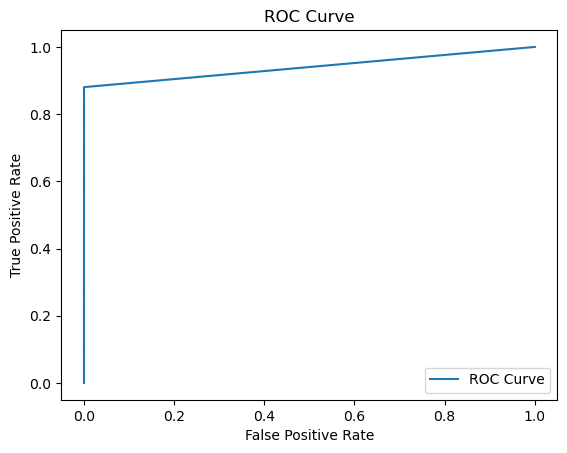

In [37]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, xgbPrediction)
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.savefig('xgb Roc curve ori ')
plt.show()

## Model Performance Evaluation

In [38]:
print("The accuracy of logistic regression is:", logAccuracy*100, "%")
print("The accuracy of RandomForest model is:", forestAccuracy*100, "%")
print("The accuracy of Decision Tree model is:", treeAccuracy*100, "%")
print("The accuracy of XGBoost model is:", xgbAccuracy*100, "%")

The accuracy of logistic regression is: 99.90028369989608 %
The accuracy of RandomForest model is: 99.96910199151709 %
The accuracy of Decision Tree model is: 99.91011488441336 %
The accuracy of XGBoost model is: 99.96629308165501 %


## Class Imbalancement

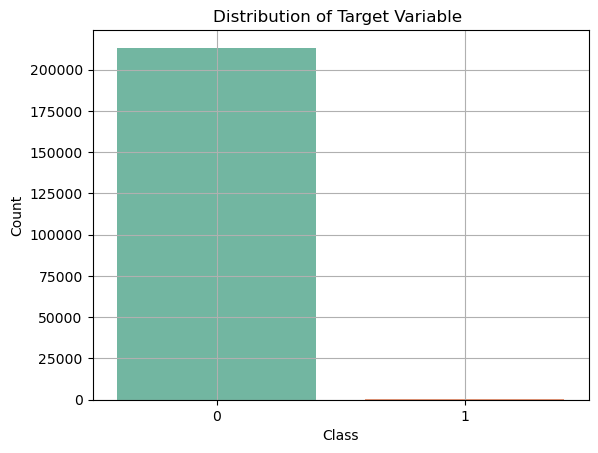

In [39]:
sns.countplot(x=y_train, palette='Set2')
plt.title('Distribution of Target Variable ')
plt.xlabel('Class')
plt.ylabel('Count')
plt.grid(True)
plt.savefig('Distribution of Target Variable')
plt.show()

In [40]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


The dataset is imbalanced in this original dataset! Most of the transactions are non-fraud.Using this dataframe as the base for predictive models and analysis, it might get a lot of errors and the algorithms will probably overfit since it will "assume" that most transactions are not fraud. 

## Equally Distributing tha dateset

### Apply undersampling using RandomUnderSampler

In [41]:
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Apply undersampling using RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

In [42]:
X_resampled

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
138028,82450.0,1.314539,0.590643,-0.666593,0.716564,0.301978,-1.125467,0.388881,-0.288390,-0.132137,...,-0.058040,-0.170307,-0.429655,-0.141341,-0.200195,0.639491,0.399476,-0.034321,0.031692,0.76
63099,50554.0,-0.798672,1.185093,0.904547,0.694584,0.219041,-0.319295,0.495236,0.139269,-0.760214,...,-0.081298,0.202287,0.578699,-0.092245,0.013723,-0.246466,-0.380057,-0.396030,-0.112901,4.18
73411,55125.0,-0.391128,-0.245540,1.122074,-1.308725,-0.639891,0.008678,-0.701304,-0.027315,-2.628854,...,0.065716,-0.133485,0.117403,-0.191748,-0.488642,-0.309774,0.008100,0.163716,0.239582,15.00
164247,116572.0,-0.060302,1.065093,-0.987421,-0.029567,0.176376,-1.348539,0.775644,0.134843,-0.149734,...,-0.169706,0.355576,0.907570,-0.018454,-0.126269,-0.339923,-0.150285,-0.023634,0.042330,57.00
148999,90434.0,1.848433,0.373364,0.269272,3.866438,0.088062,0.970447,-0.721945,0.235983,0.683491,...,-0.282777,0.103563,0.620954,0.197077,0.692392,-0.206530,-0.021328,-0.019823,-0.042682,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [43]:
y_resampled

138028    0
63099     0
73411     0
164247    0
148999    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

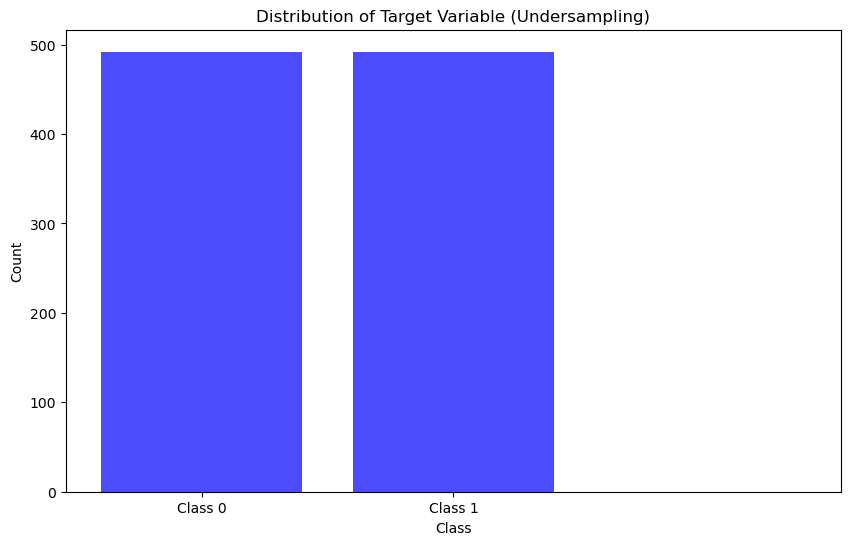

In [44]:
# Print the histogram of the resampled classes
plt.figure(figsize=(10, 6))
plt.hist(y_resampled, bins=range(4), align='left', rwidth=0.8, color='blue', alpha=0.7)
plt.title("Distribution of Target Variable (Undersampling)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(range(2), ['Class 0', 'Class 1'])
plt.savefig('Distribution of Target Variable (Undersampling)')
plt.show()

In [45]:
print('No Frauds', round(y_resampled.value_counts()[0]/len(y_resampled) * 100,2), '% of the dataset')
print('Frauds', round(y_resampled.value_counts()[1]/len(y_resampled) * 100,2), '% of the dataset')

No Frauds 50.0 % of the dataset
Frauds 50.0 % of the dataset


Now that the dataframe correctly balanced, we can split the data into train and test. After that I am going to rerun all the models for comparision.

In [46]:
# Split the data into train and test for RandomUnderSampler
X_resampledtrain, X_resampledtest, y_resampledtrain, y_resampledtest = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=23)
print("Train Shape",X_resampledtrain.shape)
print("Test Shape",X_resampledtest.shape)

Train Shape (738, 30)
Test Shape (246, 30)


In [47]:
log = LogisticRegression()
log.fit(X_resampledtrain,y_resampledtrain)
logPrediction = log.predict(X_resampledtest)
logAccuracy = metrics.accuracy_score(y_resampledtest, logPrediction)
print("The accuracy of logistic regression is:", logAccuracy*100, "%")
# printing the classification report for logistic regression model
print(metrics.classification_report(y_resampledtest, logPrediction))
confusion_matrix(y_resampledtest, logPrediction)

The accuracy of logistic regression is: 94.71544715447155 %
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       133
           1       0.92      0.97      0.94       113

    accuracy                           0.95       246
   macro avg       0.95      0.95      0.95       246
weighted avg       0.95      0.95      0.95       246



array([[123,  10],
       [  3, 110]], dtype=int64)

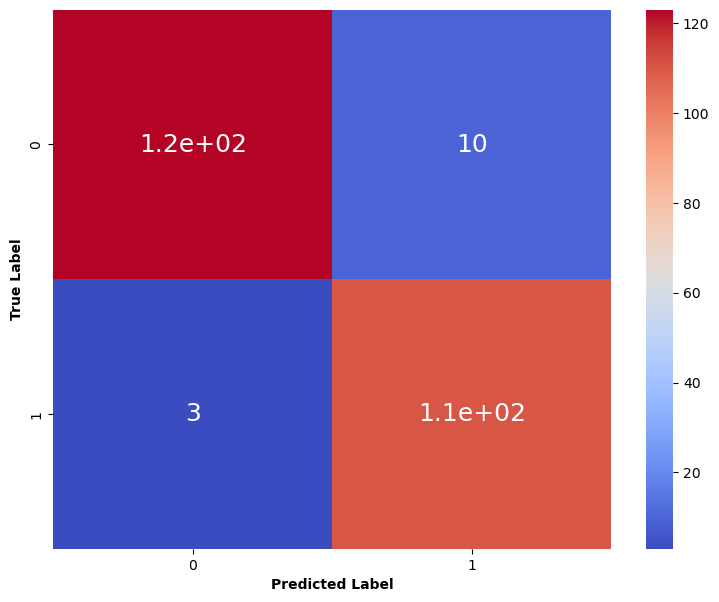

In [48]:
# Plot the confusion matrix using Seaborn library
plt.figure(figsize=(9,7))
_ = sns.heatmap(confusion_matrix(y_resampledtest, logPrediction), 
                annot=True, annot_kws={"size": 18},
                cmap=plt.cm.coolwarm)
                # xticklabels=outcome, yticklabels=outcome)
_ = plt.ylabel('True Label', fontweight='bold')
_ = plt.xlabel('Predicted Label', fontweight='bold')
plt.savefig('logPrediction confusion mat resample ')

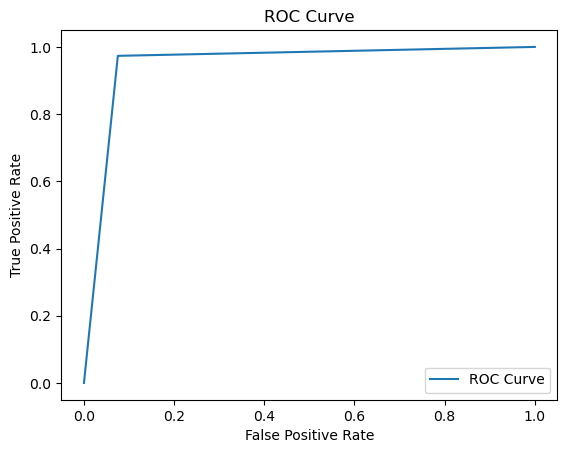

In [49]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_resampledtest, logPrediction)
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.savefig('logPrediction Roc curve resample ')
plt.show()

# ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_resampledtest, logPrediction)
auc_score = roc_auc_score(y_resampledtest, logPrediction)
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.savefig('logistic regression Roc curve ori ')
plt.show()

In [50]:
forest = RandomForestClassifier(n_estimators=50)
forest.fit(X_resampledtrain, y_resampledtrain)
forestPrediction = forest.predict(X_resampledtest)
forestAccuracy = metrics.accuracy_score(y_resampledtest, forestPrediction)
print("The accuracy of RandomForest model is:", forestAccuracy*100, "%")
# printing the classification report for Random Forest Classifier model
print(metrics.classification_report(y_resampledtest, forestPrediction))
confusion_matrix(y_resampledtest, forestPrediction)

The accuracy of RandomForest model is: 96.34146341463415 %
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       133
           1       0.96      0.96      0.96       113

    accuracy                           0.96       246
   macro avg       0.96      0.96      0.96       246
weighted avg       0.96      0.96      0.96       246



array([[129,   4],
       [  5, 108]], dtype=int64)

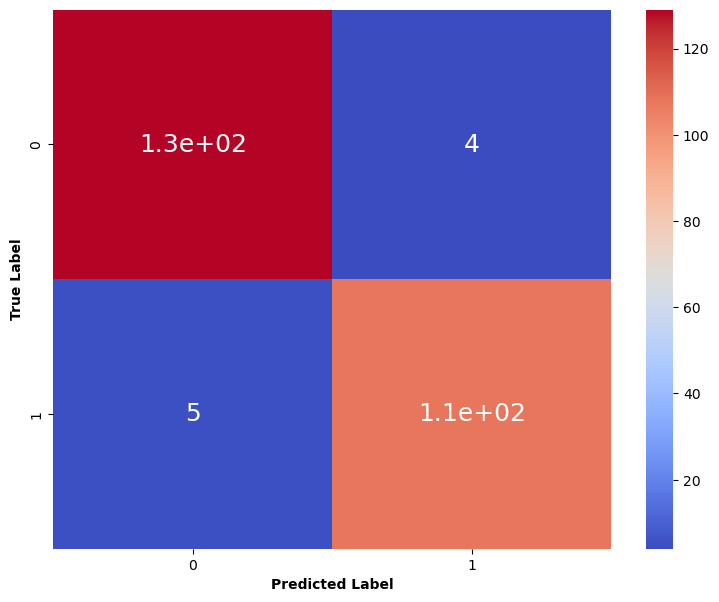

In [51]:
# Plot the confusion matrix using Seaborn library
plt.figure(figsize=(9,7))
_ = sns.heatmap(confusion_matrix(y_resampledtest, forestPrediction), 
                annot=True, annot_kws={"size": 18},
                cmap=plt.cm.coolwarm)
                # xticklabels=outcome, yticklabels=outcome)
_ = plt.ylabel('True Label', fontweight='bold')
_ = plt.xlabel('Predicted Label', fontweight='bold')
plt.savefig('forest confusion mat resample ')

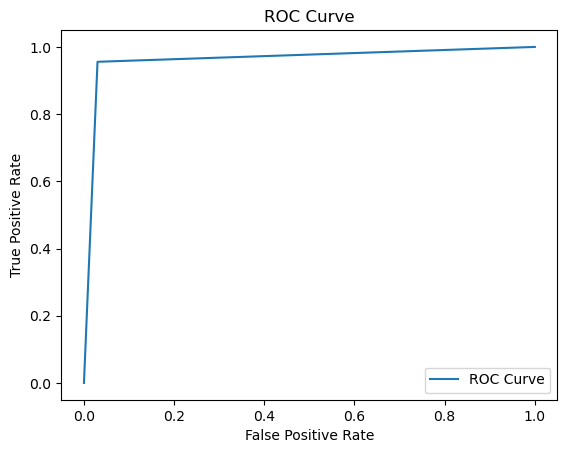

In [52]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_resampledtest, forestPrediction)
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.savefig('forestPrediction Roc curve resample ')
plt.show()

In [53]:
tree = DecisionTreeClassifier()
tree.fit(X_resampledtrain,y_resampledtrain)
treePrediction=tree.predict(X_resampledtest)
treeAccuracy = metrics.accuracy_score(y_resampledtest, treePrediction)
print("The accuracy of Decision Tree model is:", treeAccuracy*100, "%")
# printing the classification report for Decision Tree model
print(metrics.classification_report(y_resampledtest, treePrediction))
confusion_matrix(y_resampledtest, treePrediction)

The accuracy of Decision Tree model is: 93.4959349593496 %
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       133
           1       0.89      0.97      0.93       113

    accuracy                           0.93       246
   macro avg       0.93      0.94      0.93       246
weighted avg       0.94      0.93      0.94       246



array([[120,  13],
       [  3, 110]], dtype=int64)

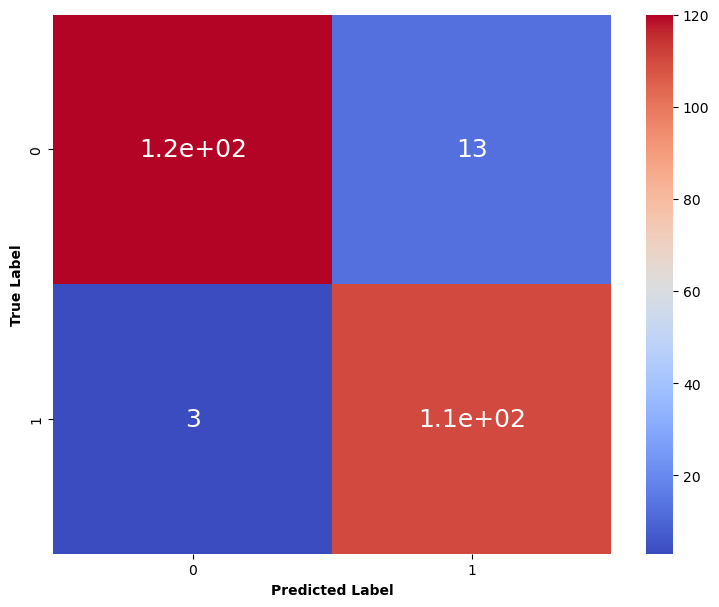

In [54]:
# Plot the confusion matrix using Seaborn library
plt.figure(figsize=(9,7))
_ = sns.heatmap(confusion_matrix(y_resampledtest, treePrediction), 
                annot=True, annot_kws={"size": 18},
                cmap=plt.cm.coolwarm)
                # xticklabels=outcome, yticklabels=outcome)
_ = plt.ylabel('True Label', fontweight='bold')
_ = plt.xlabel('Predicted Label', fontweight='bold')
plt.savefig('tree confusion mat resample ')

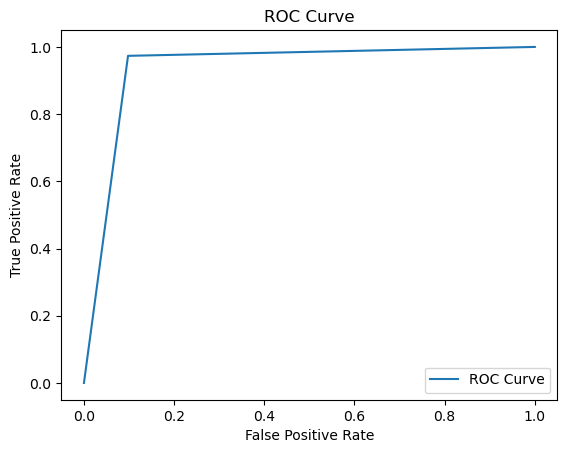

In [55]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_resampledtest, treePrediction)
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.savefig('treePrediction Roc curve resample ')
plt.show()

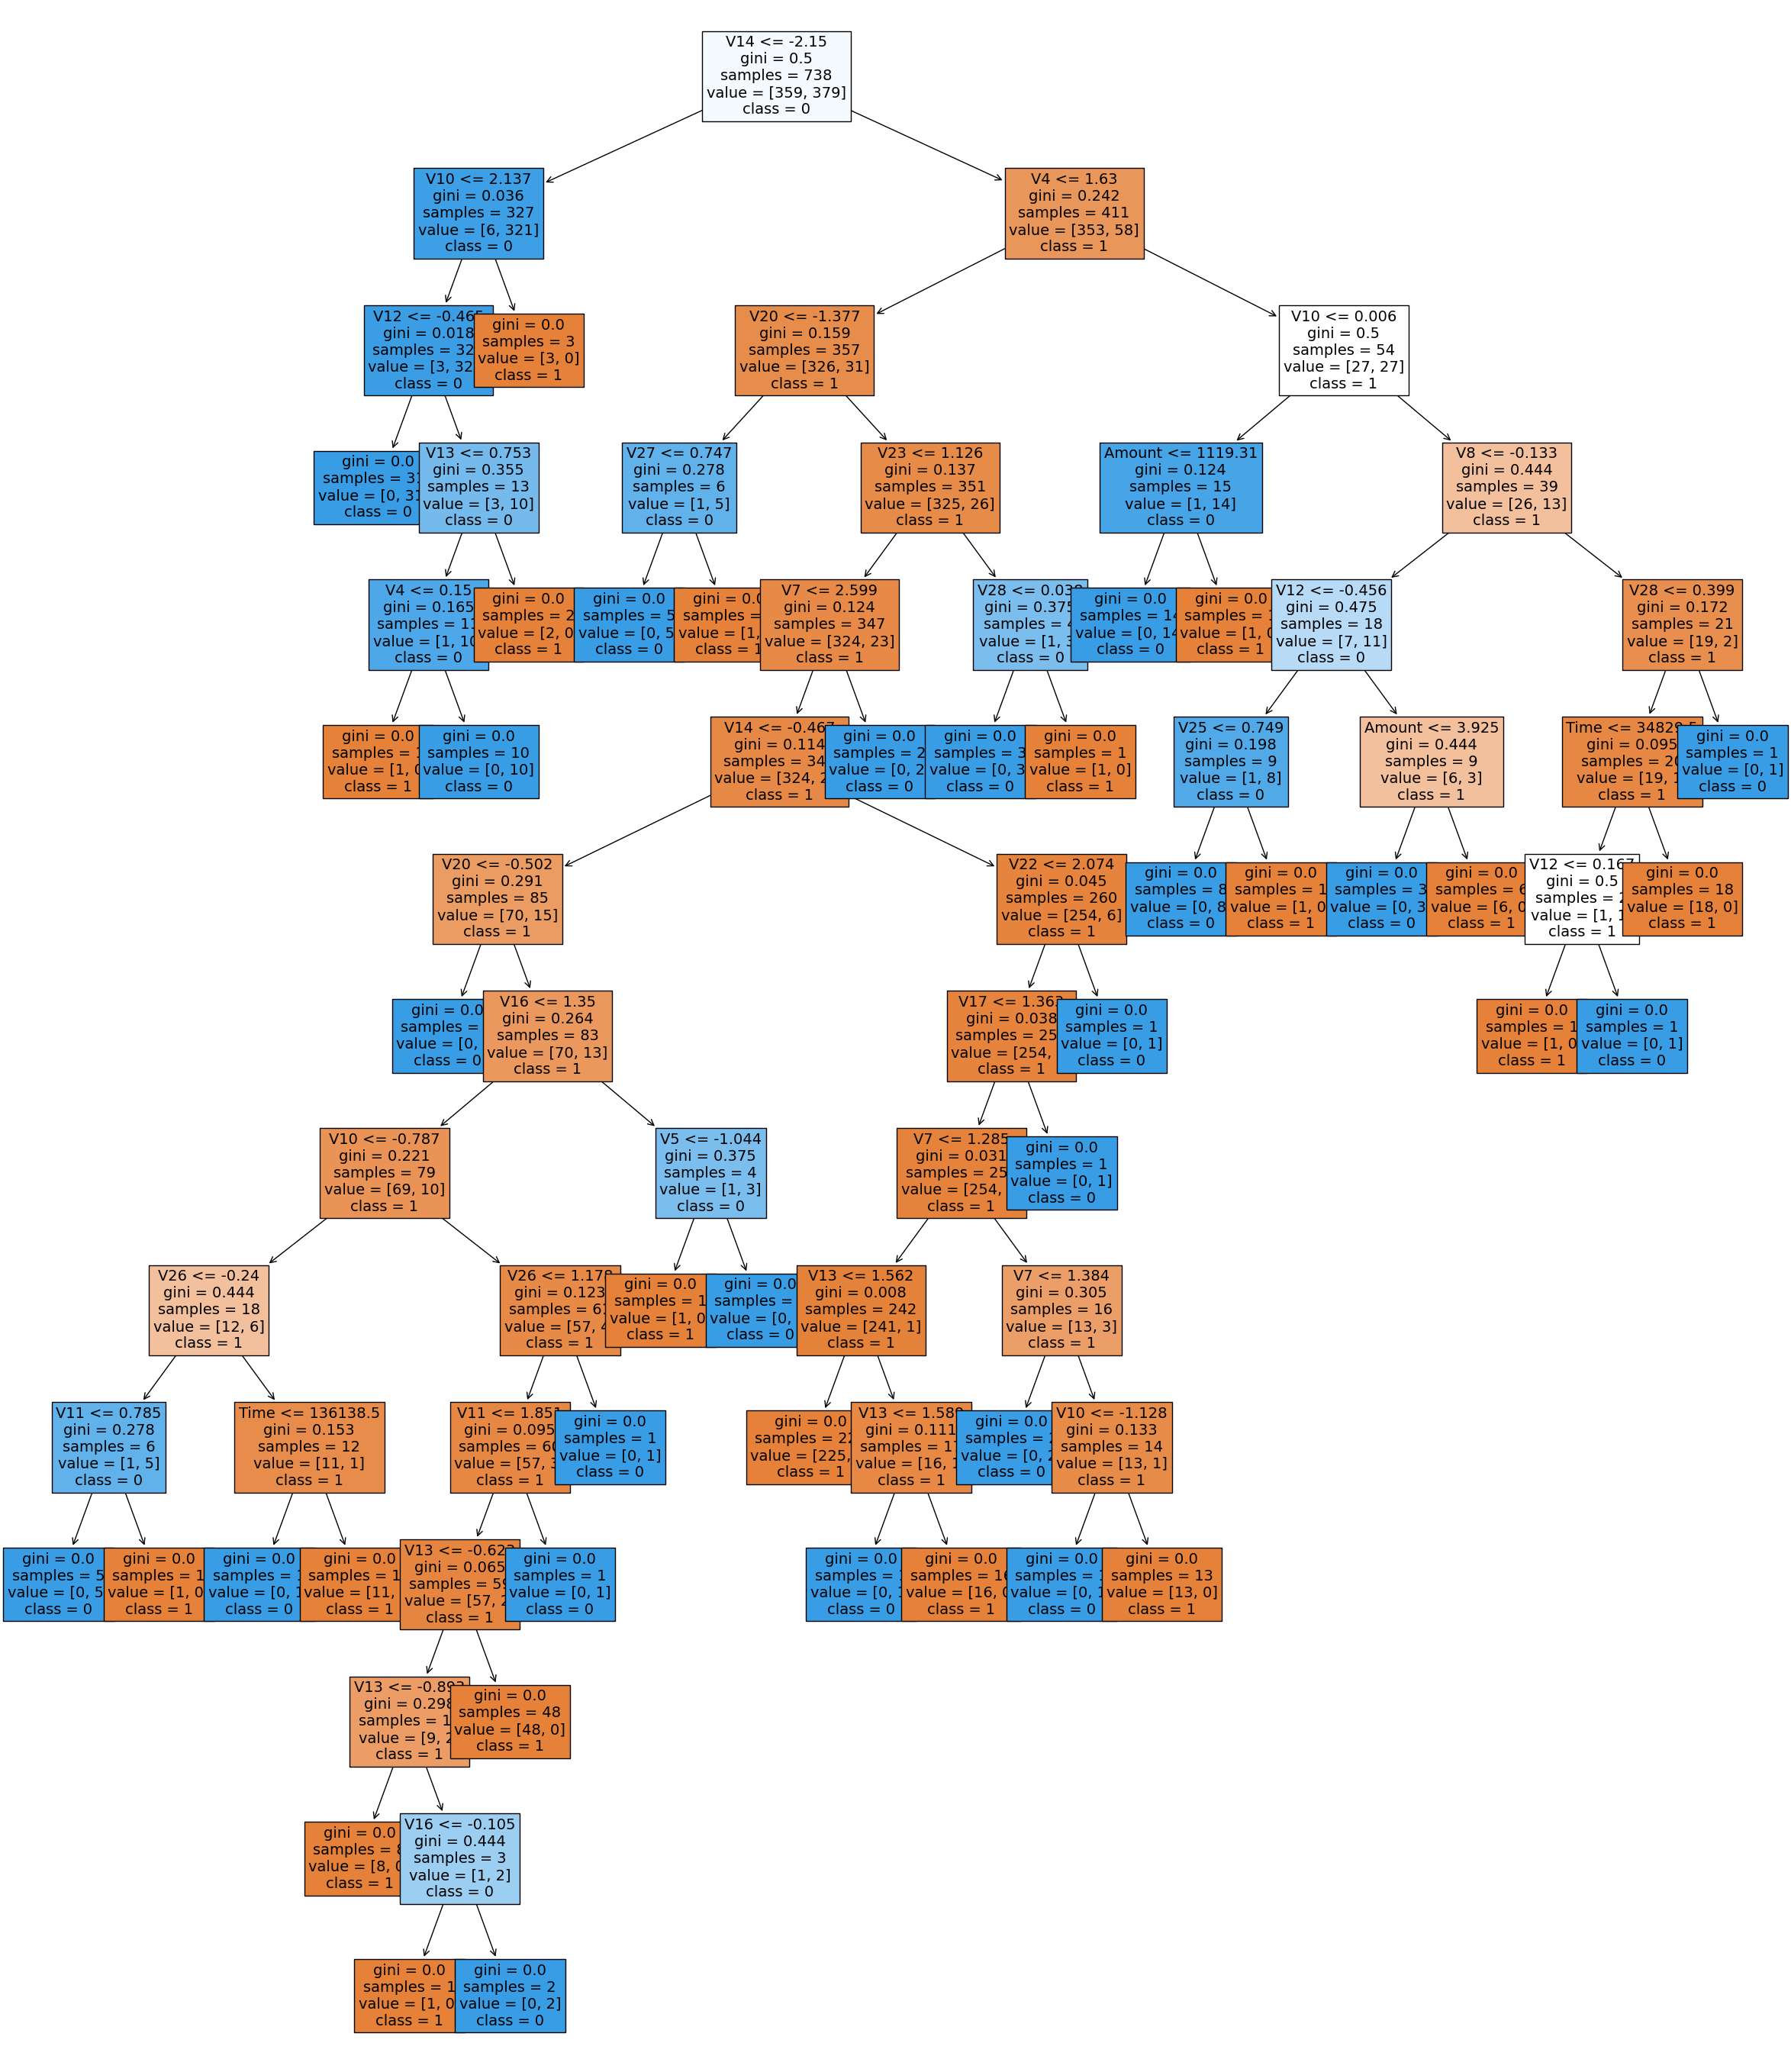

In [56]:
from sklearn import tree

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_resampledtrain, y_resampledtrain)

# Generate the tree plot
plt.figure(figsize=(30, 35))
tree_plot = tree.plot_tree(
    decision_tree,  # Pass the trained decision tree model
    feature_names=X_resampledtrain.columns,
    class_names=[str(cls) for cls in y_resampledtrain.unique()],
    filled=True,
    fontsize=14
)
plt.show()


In [57]:
# Calculate the ratio of non-fraud to fraud cases in the training data
ratio_of_nonfraud_to_fraud = (y_resampledtrain.value_counts()[0] / y_resampledtrain.value_counts()[1])
xgb_model = XGBClassifier(scale_pos_weight=ratio_of_nonfraud_to_fraud, random_state=42)
xgb_model.fit(X_resampledtrain, y_resampledtrain)
xgbPrediction = xgb_model.predict(X_resampledtest)
xgbAccuracy = metrics.accuracy_score(y_resampledtest, xgbPrediction)
print("The accuracy of XGBoost model is:", xgbAccuracy*100, "%")
# printing the classification report for XGBoost model
print(metrics.classification_report(y_resampledtest, xgbPrediction))
confusion_matrix(y_resampledtest, xgbPrediction)

The accuracy of XGBoost model is: 96.34146341463415 %
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       133
           1       0.96      0.96      0.96       113

    accuracy                           0.96       246
   macro avg       0.96      0.96      0.96       246
weighted avg       0.96      0.96      0.96       246



array([[129,   4],
       [  5, 108]], dtype=int64)

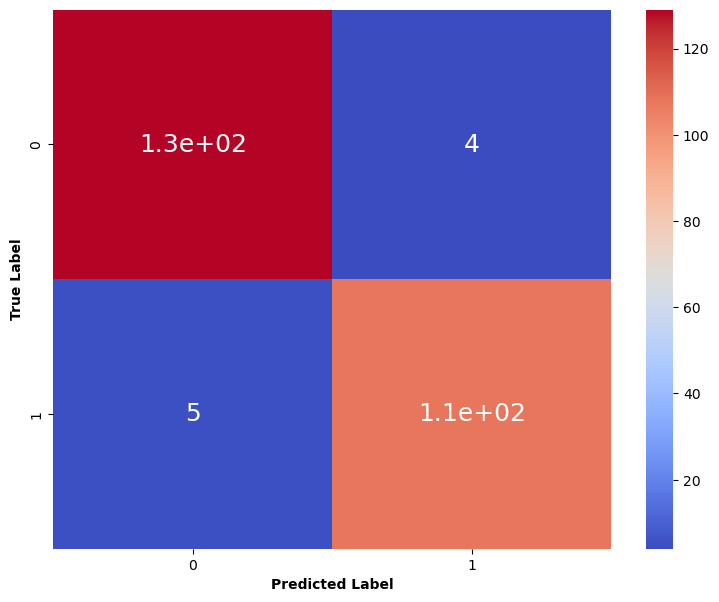

In [58]:
# Plot the confusion matrix using Seaborn library
plt.figure(figsize=(9,7))
_ = sns.heatmap(confusion_matrix(y_resampledtest, xgbPrediction), 
                annot=True, annot_kws={"size": 18},
                cmap=plt.cm.coolwarm)
                # xticklabels=outcome, yticklabels=outcome)
_ = plt.ylabel('True Label', fontweight='bold')
_ = plt.xlabel('Predicted Label', fontweight='bold')
plt.savefig('xgb confusion mat resample ')

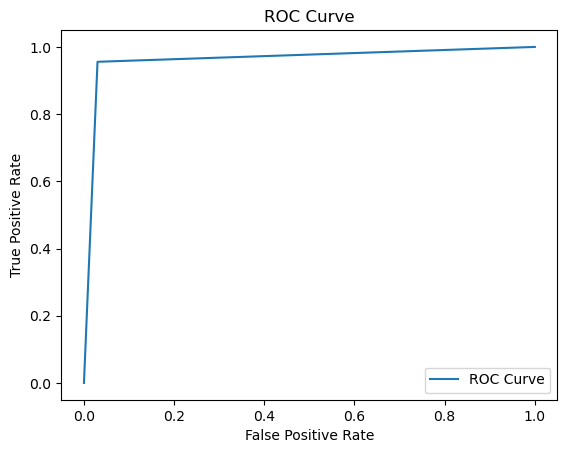

In [59]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_resampledtest, xgbPrediction)
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.savefig('xgbPrediction Roc curve resample ')
plt.show()

In [60]:
print("After resampling")
print("The accuracy of logistic regression is:", logAccuracy*100, "%")
print("The accuracy of RandomForest model is:", forestAccuracy*100, "%")
print("The accuracy of Decision Tree model is:", treeAccuracy*100, "%")
print("The accuracy of XGBoost model is:", xgbAccuracy*100, "%")

After resampling
The accuracy of logistic regression is: 94.71544715447155 %
The accuracy of RandomForest model is: 96.34146341463415 %
The accuracy of Decision Tree model is: 93.4959349593496 %
The accuracy of XGBoost model is: 96.34146341463415 %


### Conclusion

The final model successfully detected fraudulent transactions with high accuracy.
Importance of addressing data imbalance and rigorous model evaluation.
Integrating real-time data streaming, testing additional models, and exploring deep learning techniques.
XGBoost is the model selected for this dataset based on recall rather than preciseion.